# Data Preparation

1. Потренироваться определять типы переменных в датасете, целевую переменную из постановки задачи, распределение переменных.
2. Познакомиться с задачей, предстоящей на этапе моделирования.
3. Начать исследовать данные для этапа моделирования.

### Описание датасета:
- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.



In [93]:
# Импортируйте необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

### Загрузка датасета и ознакомление с ним

Для начала требуется загрузим датасет и ознакомимся с его характеристиками.

In [119]:
df = pd.read_csv('data/vehicles_dataset.csv', sep=',')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,NaN,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,NaN,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,NaN,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,NaN,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


Размер датасета.

In [120]:
print(df.shape)

(10050, 27)


In [121]:
#список колонок датасета
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'price_category'],
      dtype='object')

In [122]:
#описательные статистики для всего датасета
df.describe()

,id,price,year,odometer,county,lat,long
count,1.005000e+04,1.005000e+04,10014.000000,1.000700e+04,0.0,9951.000000,9951.000000
mean,7.311544e+09,2.068429e+04,2010.917815,9.565719e+04,NaN,38.590164,-94.161564
std,4.475414e+06,1.243216e+05,9.697849,8.657948e+04,NaN,5.844756,18.123096
min,7.208550e+09,5.000000e+02,1915.000000,0.000000e+00,NaN,-67.144243,-158.069300
25%,7.308193e+09,7.900000e+03,2008.000000,3.899450e+04,NaN,34.830000,-110.447150
50%,7.312756e+09,1.574950e+04,2013.000000,8.837700e+04,NaN,39.285100,-87.999100
75%,7.315275e+09,2.799000e+04,2017.000000,1.370000e+05,NaN,42.427590,-80.830000
max,7.317090e+09,1.234568e+07,2022.000000,3.245000e+06,NaN,64.947500,173.885502


###  Исследование переменных датасета

После ознакомления с датасетом посмотрим, какие значения принимают переменные с характеристиками.

Распечатаем в цикле по каждой колонке название колонки, количество уникальных значений, а затем список возможных значений вместе с их количеством появления в датасете.

In [123]:
cols = df.columns
for col in cols:
    print(f"Характеристика: {col}")
    print(f"Количество уникальных значений: {df[col].nunique()}")
    print(f"Список значений: {df[col]}")
    print(df[col])
    print('///////////////////////////////////////////////////')



Характеристика: id
Количество уникальных значений: 10000
Список значений: 0        7308295377
1        7316380095
2        7313733749
3        7308210929
4        7316474668
            ...    
10045    7304876387
10046    7316152972
10047    7310993818
10048    7306637427
10049    7311960763
Name: id, Length: 10050, dtype: int64
0        7308295377
1        7316380095
2        7313733749
3        7308210929
4        7316474668
            ...    
10045    7304876387
10046    7316152972
10047    7310993818
10048    7306637427
10049    7311960763
Name: id, Length: 10050, dtype: int64
///////////////////////////////////////////////////
Характеристика: url
Количество уникальных значений: 10000
Список значений: 0        https://chattanooga.craigslist.org/ctd/d/chatt...
1        https://newjersey.craigslist.org/ctd/d/carlsta...
2        https://reno.craigslist.org/ctd/d/atlanta-2017...
3        https://fayetteville.craigslist.org/ctd/d/rale...
4        https://newyork.craigslist.org/lgi/cto

### Определение типов переменных в датасете

После ознакомления с характеристиками заполним в таблице, к какому типу относятся некоторые переменные. 


|  Переменная    | Дискретная | Непрерывная | Качественная |
|----------------|------------|-------------|--------------|
| id             | X          |             |              |
| region         |            |             |X             |
| year           | X          |             |              |
| manufacturer   |            |             |X             |
| condition      |            |             |X             |
| fuel           |            |             |X             |
| odometer       |            |X            |              |
| title_status   |            |             |X             |
| transmission   |            |             |X             |
| VIN            |            |             |X             |
| drive          |            |             |X             |
| paint_color    |            |             |X             |
| state          |            |             |X             |
| price_category |            |             |X             |



### Определение целевой переменной в данных и распределения переменных

In [124]:
# 

2. Выведем для каждого значения целевой переменной его долю вхождения в выборку

In [125]:
df.price_category.unique()

array(['high', 'medium', 'low'], dtype=object)

In [126]:
count_high = df.loc[df.price_category == 'high', 'price_category'].count()
count_medium = df.loc[df.price_category == 'medium', 'price_category'].count()
count_low = df.loc[df.price_category == 'low', 'price_category'].count()

In [127]:
# count_high = df.loc[df.price_category == 'high'].count()
count_high

3514

In [128]:
count_all = df['price_category'].count()

In [129]:
print(f"доля вхождения значения 'high' - {count_high / count_all}")
print(f"доля вхождения значения 'medium' - {count_medium / count_all}")
print(f"доля вхождения значения 'low' - {count_low / count_all}")

доля вхождения значения 'high' - 0.3496517412935323
доля вхождения значения 'medium' - 0.32776119402985077
доля вхождения значения 'low' - 0.3225870646766169


3. Ещё раз посмотрим на долю или количество вхождений каждого значения целевой переменной в выборку и напишем, какое это распределение. Определить, как распределены значения целевой переменной, в данном случае можно и без графика. 

**Ответ:** 

## Разведочный анализ данных: Data Cleaning

* Потренироваться выявлять и заполнять пропущенные значения в данных.
* Потренироваться преобразовывать типы данных.
* Потренироваться выявлять и обрабатывать аномальные значения в данных.
* Подготовить датафрейм к этапу генерации признаков.



In [130]:
print('Размер выбоpки: {}, {}'.format(df.shape[0], df.shape[1]))

Размер выбоpки: 10050, 27


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10050 non-null  int64  
 1   url             10050 non-null  object 
 2   region          10050 non-null  object 
 3   region_url      10050 non-null  object 
 4   price           10050 non-null  int64  
 5   year            10014 non-null  float64
 6   manufacturer    9665 non-null   object 
 7   model           9921 non-null   object 
 8   condition       6268 non-null   object 
 9   cylinders       5953 non-null   object 
 10  fuel            9987 non-null   object 
 11  odometer        10007 non-null  float64
 12  title_status    9884 non-null   object 
 13  transmission    10005 non-null  object 
 14  VIN             6086 non-null   object 
 15  drive           7026 non-null   object 
 16  size            2825 non-null   object 
 17  type            7845 non-null  

In [132]:
# Выведем количество полностью заполненных объектов и их процент из всей выборки

In [133]:
values = ((df.isna().sum() / len(df)) * 100).sort_values()
count = 0

for i in values:
    if i == 0:
        count += 1
print(f'Количество полностью заполненных объектов - {count}')
print(f'Их процент из всей выборки - {int(count / len (values) * 100)}%')

Количество полностью заполненных объектов - 7
Их процент из всей выборки - 25%


In [134]:
not_missing_columns = values[values.values == 0].index.tolist()
print(f'Количество полностью заполненных объектов - {len(not_missing_columns)}')
print(f'Их процент из всей выборки - {int(len(not_missing_columns) / len (values) * 100)}%')

Количество полностью заполненных объектов - 7
Их процент из всей выборки - 25%


Сохраним в переменную и выведем процент пропущенных значений для каждого признака, отсортируем признаки по убыванию процента пропущенных значений. 

In [135]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
missing_values

county            100.000000
size               71.890547
cylinders          40.766169
VIN                39.442786
condition          37.631841
drive              30.089552
paint_color        29.482587
type               21.940299
manufacturer        3.830846
title_status        1.651741
model               1.283582
long                0.985075
lat                 0.985075
fuel                0.626866
transmission        0.447761
odometer            0.427861
year                0.358209
posting_date        0.019900
image_url           0.019900
description         0.019900
state               0.000000
id                  0.000000
url                 0.000000
price               0.000000
region_url          0.000000
region              0.000000
price_category      0.000000
dtype: float64

In [136]:
df = df.drop(['county', 'size', 'VIN', 'cylinders', 'condition', 'drive', 'paint_color', 'type'], axis=1)

In [137]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
missing_values

manufacturer      3.830846
title_status      1.651741
model             1.283582
long              0.985075
lat               0.985075
fuel              0.626866
transmission      0.447761
odometer          0.427861
year              0.358209
description       0.019900
posting_date      0.019900
image_url         0.019900
state             0.000000
id                0.000000
url               0.000000
price             0.000000
region_url        0.000000
region            0.000000
price_category    0.000000
dtype: float64

### Обработка пропусков в годе выпуска автомобиля

In [138]:
#количество значений для года выпуска автомобиля, включая пропущенные значения
df.year.value_counts(dropna=False)

2018.0    814
2017.0    814
2016.0    748
2013.0    704
2015.0    670
         ... 
1927.0      1
1958.0      1
1941.0      1
1935.0      1
1954.0      1
Name: year, Length: 90, dtype: int64

In [139]:
#количество пропущенных значений в годе выпуска автомобиля
df.year.isna().sum()

36

In [140]:
#описательные статистики для года выпуска автомобиля
df.year.describe()

count    10014.000000
mean      2010.917815
std          9.697849
min       1915.000000
25%       2008.000000
50%       2013.000000
75%       2017.000000
max       2022.000000
Name: year, dtype: float64

In [141]:
#записи, в которых год выпуска автомобиля не заполнен
df[df.year.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
344,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,35880,NaN,NaN,500,gas,13508.0,clean,automatic,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,wa,47.434493,-120.320759,2021-04-09T06:31:03-0700,high
420,7316337069,https://lasvegas.craigslist.org/ctd/d/scottsda...,las vegas,https://lasvegas.craigslist.org,84995,NaN,NaN,Super Duty F-350 SRW,diesel,1268.0,clean,automatic,https://images.craigslist.org/00x0x_iQCC0Ef28S...,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...,nv,33.458277,-111.925970,2021-05-03T11:31:39-0700,high
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,NaN,NaN,Grand Caravan,NaN,21.0,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high
702,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,28498,NaN,NaN,olet Silverado 1500,NaN,59246.0,NaN,automatic,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,tn,36.138022,-86.732261,2021-05-03T10:00:40-0500,high
893,7316840794,https://denver.craigslist.org/ctd/d/american-f...,denver,https://denver.craigslist.org,60900,NaN,NaN,F-150,gas,6110.0,clean,automatic,https://images.craigslist.org/01616_bpzSdSRTbx...,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...",co,40.362248,-111.785947,2021-05-04T12:11:22-0600,high
906,7311915616,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,67900,NaN,NaN,Odyssey,gas,21.0,clean,automatic,https://images.craigslist.org/00404_erlbeKWEkn...,2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...,co,39.674406,-104.998604,2021-04-24T10:41:06-0600,high
1005,7306735187,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,38900,NaN,NaN,Grand Caravan,NaN,21.0,clean,automatic,https://images.craigslist.org/00F0F_3T6FM0XMZW...,"2019 *Dodge* *Grand Caravan* SE - $38,900Call ...",co,39.674406,-104.998604,2021-04-14T10:51:36-0600,high
1217,7309954650,https://gainesville.craigslist.org/ctd/d/gaine...,gainesville,https://gainesville.craigslist.org,24975,NaN,NaN,CR-V,gas,44128.0,clean,automatic,https://images.craigslist.org/00000_2TUtAgLlCR...,"2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o...",fl,29.676827,-82.319202,2021-04-20T14:46:55-0400,high
1319,7313865045,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,47900,NaN,NaN,a Sienna,gas,43701.0,clean,automatic,https://images.craigslist.org/00o0o_8XYp4Zygdj...,2018 *Toyota* *Sienna* LE Automatic Access Sea...,co,39.674406,-104.998604,2021-04-28T10:12:14-0600,high
1846,7303344554,https://daytona.craigslist.org/ctd/d/new-smyrn...,daytona beach,https://daytona.craigslist.org,35850,NaN,NaN,Transit Cargo Van,gas,567.0,clean,automatic,https://images.craigslist.org/00a0a_d4XVrHnlxl...,"2020 *Ford* *Transit Cargo Van* T-250 148"" WB*...",fl,29.046240,-80.934561,2021-04-07T17:10:06-0400,high


Обработаем пропуски, удалив записи, в которых год выпуска автомобиля не заполнен, и сохраним обновлённый датафрейм, а затем выведем его размерность

In [142]:
df.year = df.year.dropna()

In [143]:
df.dropna(subset=['year'], inplace=True)

In [144]:
df[df.year.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category


In [145]:
df.shape

(10014, 19)

In [146]:
print("Количество пропущенных значений в year:", df.year.isna().sum())

Количество пропущенных значений в year: 0


### Обработка пропусков в типе топлива

In [147]:
df.fuel.value_counts(dropna=False)

gas         8424
other        732
diesel       652
hybrid       108
NaN           54
electric      44
Name: fuel, dtype: int64

In [148]:
df.fuel.describe()

count     9960
unique       5
top        gas
freq      8424
Name: fuel, dtype: object

In [149]:
df[df.fuel.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023.0,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
32,7309910590,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,4977,2001.0,toyota,camry solara 2dr cpe se v6 auto (natl),NaN,193242.0,clean,automatic,https://images.craigslist.org/00F0F_ebtJlxCQjv...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-20T10:40:15-0700,low
78,7314559074,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,27977,2009.0,ford,"f-150 4wd supercrew 145"" platinum",NaN,79522.0,clean,automatic,https://images.craigslist.org/00L0L_khoMmqXaSJ...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-29T15:15:30-0700,high
275,7315141987,https://honolulu.craigslist.org/oah/ctd/d/fort...,hawaii,https://honolulu.craigslist.org,29888,2019.0,nissan,frontier crew cab 4x2 sv auto,NaN,10679.0,clean,automatic,https://images.craigslist.org/00F0F_d9wEXQuSyu...,***Call Us for more information at: 877-262-34...,hi,21.344376,-157.896975,2021-04-30T15:50:19-1000,high
471,7316807613,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,13436,2006.0,chevrolet,"silverado 1500 ext cab 143.5"" wb 4wd ls",NaN,172700.0,clean,automatic,https://images.craigslist.org/00l0l_35tV0gQdD8...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-05-04T10:20:19-0700,medium
1009,7314561306,https://cnj.craigslist.org/ctd/d/parlin-2000-c...,central NJ,https://cnj.craigslist.org,5894,2000.0,chevrolet,"s-10 ext cab 123"" wb ls",NaN,78740.0,clean,automatic,https://images.craigslist.org/00O0O_8vd70bT1rY...,***Call Us for more information at: 732-316-55...,nj,40.468650,-74.296990,2021-04-29T18:20:19-0400,low
1279,7310297136,https://westernmass.craigslist.org/ctd/d/johns...,western massachusetts,https://westernmass.craigslist.org,6000,2008.0,NaN,IC IC,NaN,0.0,NaN,automatic,https://images.craigslist.org/00404_cBFpBKbfr2...,"2008 *IC* *IC* CE300 - $6,000Call Us Today! 85...",ma,43.008105,-74.352011,2021-04-21T10:11:05-0400,low
1318,7310414739,https://nwct.craigslist.org/ctd/d/melville-200...,northwest CT,https://nwct.craigslist.org,11995,2007.0,gmc,c-7500 multiple uses perfect,NaN,50098.0,clean,automatic,https://images.craigslist.org/00T0T_jvsOAKSGAr...,2007 *GMC* *C-7500 MULTIPLE USES PERFECT* FOR ...,ct,40.681179,-73.430488,2021-04-21T13:18:41-0400,medium
1687,7316342709,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,19942,2017.0,ram,"promaster cargo van 1500 low roof 118"" wb",NaN,88836.0,clean,automatic,https://images.craigslist.org/00707_6ZlIIpYmGf...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T14:40:24-0400,medium
1848,7315151536,https://honolulu.craigslist.org/oah/ctd/d/fort...,hawaii,https://honolulu.craigslist.org,29988,2019.0,toyota,sienna le fwd 8-passenger (natl),NaN,18762.0,clean,automatic,https://images.craigslist.org/00R0R_dO0gtiRwLa...,***Call Us for more information at: 877-262-34...,hi,21.344376,-157.896975,2021-04-30T16:25:22-1000,high


Обработаем пропуски, заполнив незаполненные значения типа топлива значением other, и сохраним изменения. Обратите внимание, что мы заполняем пропуски не самым популярным значением в выборке

In [150]:
df.fuel = df.fuel.fillna('other')

In [151]:
print("Количество пропущенных значений в fuel:", df.fuel.isna().sum())

Количество пропущенных значений в fuel: 0


### Обработка пропусков в модели автомобиля

In [152]:
df.model.value_counts(dropna=False)

f-150                        151
NaN                          127
silverado 1500               110
1500                         101
camry                         77
                            ... 
xc60 t6 inscription sport      1
silverado 1500 ls              1
silverado diesel 3500          1
q50 2.0t luxe sedan 4d         1
a3 2.0t premium plus pzev      1
Name: model, Length: 3447, dtype: int64

In [153]:
df.model.describe()

count      9887
unique     3446
top       f-150
freq        151
Name: model, dtype: object

In [154]:
df[df.model.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
67,7316913641,https://ventura.craigslist.org/cto/d/camarillo...,ventura county,https://ventura.craigslist.org,3000,2005.0,rover,NaN,gas,165206.0,clean,automatic,https://images.craigslist.org/00S0S_b3yx6L4N2S...,2005 Range Rover HSE Changed Oil and now engi...,ca,34.219565,-119.001986,2021-05-04T13:11:15-0700,low
142,7316550853,https://chicago.craigslist.org/chc/cto/d/midlo...,chicago,https://chicago.craigslist.org,3000,2006.0,jeep,NaN,gas,132000.0,clean,automatic,https://images.craigslist.org/01111_kNv3EKjH4H...,SUPER CLEAN 2006 JEEP LIBEERY RANAGADE 4X4 O...,il,41.618957,-87.726334,2021-05-03T20:33:40-0500,low
151,7303575863,https://worcester.craigslist.org/ctd/d/fitchbu...,worcester / central MA,https://worcester.craigslist.org,7800,2007.0,gmc,NaN,gas,190000.0,clean,automatic,https://images.craigslist.org/00f0f_iWjiToqea2...,2007 gmc with plow leather loaded nice truck r...,ma,42.579600,-71.803100,2021-04-08T09:10:07-0400,low
200,7315267860,https://gainesville.craigslist.org/ctd/d/kissi...,gainesville,https://gainesville.craigslist.org,19200,2012.0,ram,NaN,gas,121371.0,clean,automatic,https://images.craigslist.org/00W0W_hHV4D0Po0G...,2012 RAM 1500 Laramie Crew Cab 2WD Offered...,fl,28.329026,-81.404237,2021-05-01T10:05:17-0400,medium
251,7316024407,https://reading.craigslist.org/ctd/d/paterson-...,reading,https://reading.craigslist.org,18695,2007.0,ram,NaN,diesel,220019.0,clean,automatic,https://images.craigslist.org/00n0n_jgq4eOvH7I...,2007 Dodge Ram 2500 SLT 4x4 Quad Cab Cummins D...,pa,40.894535,-74.152367,2021-05-02T21:06:09-0400,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,7314341390,https://desmoines.craigslist.org/cto/d/urbanda...,des moines,https://desmoines.craigslist.org,8000,2007.0,toyota,NaN,gas,85285.0,clean,automatic,https://images.craigslist.org/00K0K_aMoJgOIueB...,Toyota has been owned by non smoker with no pe...,ia,41.629500,-93.723000,2021-04-29T10:50:54-0500,low
9659,7304358131,https://vermont.craigslist.org/ctd/d/salem-201...,vermont,https://vermont.craigslist.org,19944,2012.0,ram,NaN,gas,73082.0,clean,automatic,https://images.craigslist.org/00A0A_bfCaGJ20IX...,2012 RAM 1500 4WD REGULAR CAB SHORT BED 5.7 HE...,vt,42.788204,-71.233728,2021-04-09T16:24:23-0400,medium
9714,7309686008,https://louisville.craigslist.org/cto/d/radcli...,louisville,https://louisville.craigslist.org,1600,2005.0,gmc,NaN,gas,52536.0,clean,automatic,https://images.craigslist.org/01111_99unV6cYER...,GMC Savana PRO AWD cargo van has been driven l...,ky,37.858900,-86.006900,2021-04-20T04:48:30-0400,low
9974,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017.0,rover,NaN,gas,47000.0,clean,automatic,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03T16:37:36-0500,high


Если подробнее изучить значения описания автомобиля, то, возможно, модель автомобиля получится восстановить из описания. Сейчас же обработаем пропуски, заполнив незаполненные значения модели автомобиля значением other, и сохраните изменения. Обратите внимание, что мы в очередной раз заполняем пропуски не самым популярным значением в выборке.

In [155]:
df.model = df.model.fillna('other')

In [156]:
print("Количество пропущенных значений в model:", df.model.isna().sum())

Количество пропущенных значений в model: 0


### Обработка пропусков в статусе автомобиля

In [157]:
df.title_status.value_counts(dropna=False)

clean         9542
rebuilt        168
NaN            159
salvage         92
lien            35
missing         16
parts only       2
Name: title_status, dtype: int64

In [158]:
df.title_status.describe()

count      9855
unique        6
top       clean
freq       9542
Name: title_status, dtype: object

In [159]:
df[df.title_status.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
11,7316540706,https://cincinnati.craigslist.org/ctd/d/fairfi...,cincinnati,https://cincinnati.craigslist.org,4995,2012.0,fiat,500 pop,gas,59242.0,NaN,manual,https://images.craigslist.org/00Z0Z_jbUmVcYlwR...,"2012 Fiat 500 Pop FOR ONLY $102/mo!59,242 mi. ...",oh,39.297045,-84.563243,2021-05-03T21:03:32-0400,low
187,7313570594,https://orangecounty.craigslist.org/ctd/d/coro...,orange county,https://orangecounty.craigslist.org,17900,2013.0,ram,1500 tradesman quad cab,gas,145499.0,NaN,automatic,https://images.craigslist.org/00H0H_1JFMPCYyW8...,2013 Ram 1500 Tradesman Quad Cab PRICED TO SEL...,ca,33.873436,-117.542806,2021-04-27T15:03:47-0700,medium
245,7315211652,https://ocala.craigslist.org/ctd/d/riverview-2...,ocala,https://ocala.craigslist.org,40990,2019.0,toyota,sienna xle,gas,3700.0,NaN,automatic,https://images.craigslist.org/01111_grKNF8GrXz...,2019 Toyota Sienna - Wheelchair Accessible Han...,fl,27.849760,-82.364950,2021-05-01T06:35:56-0400,high
286,7306702976,https://toledo.craigslist.org/ctd/d/chelsea-73...,toledo,https://toledo.craigslist.org,4592,2003.0,chevrolet,avalanche 1500,gas,268691.0,NaN,automatic,https://images.craigslist.org/00808_1IOMJuA4GL...,$73/mo - 2003 Chevrolet Avalanche 1500 BaseCre...,oh,42.300673,-84.024108,2021-04-14T12:03:01-0400,low
312,7307609203,https://roseburg.craigslist.org/ctd/d/eugene-2...,roseburg,https://roseburg.craigslist.org,18450,2017.0,ford,mustang,gas,66049.0,NaN,automatic,https://images.craigslist.org/00505_4apF36sLbP...,"2017 Ford MUSTANG - $18,450 \tMayberry Motors ...",or,44.058499,-123.106176,2021-04-16T04:06:29-0700,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,7301707830,https://tricities.craigslist.org/ctd/d/bristol...,tri-cities,https://tricities.craigslist.org,8995,2013.0,honda,odyssey,gas,203112.0,NaN,automatic,https://images.craigslist.org/00u0u_bawW7HN8xW...,"2013 *Honda* *Odyssey* 5dr EX Van FWD - $8,995...",tn,36.541821,-82.234645,2021-04-04T13:12:27-0400,low
9851,7313949726,https://harrisburg.craigslist.org/ctd/d/brockp...,harrisburg,https://harrisburg.craigslist.org,8900,2012.0,honda,accord,other,NaN,NaN,NaN,https://images.craigslist.org/01212_dsfYRNhxfd...,Car Starz Call Sales at 717-401-4221 2012 Hond...,pa,41.261540,-78.704520,2021-04-28T14:25:32-0400,low
9887,7314987181,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,20900,2014.0,lexus,rx 350,gas,70800.0,NaN,automatic,https://images.craigslist.org/00Q0Q_cGablAkoYV...,2014 *Lexus* *RX 350* 2014 LEXUS RX 350 SUV 1-...,tn,36.138022,-86.732261,2021-04-30T15:00:48-0500,medium
9903,7309717260,https://savannah.craigslist.org/ctd/d/jacksonv...,savannah / hinesville,https://savannah.craigslist.org,11495,2006.0,lexus,gx 470,gas,242000.0,NaN,automatic,https://images.craigslist.org/00s0s_8xg4gw6aAg...,"2006 *Lexus* *GX 470* 4dr SUV 4WD - $11,495By ...",ga,30.513566,-81.621875,2021-04-20T08:01:49-0400,medium


Обработаем пропуски, заполнив незаполненные значения статуса автомобиля самым популярным значением, и сохраните изменения.

In [160]:
df.title_status = df.title_status.fillna('clean')

In [161]:
print("Количество пропущенных значений в title_status:", df.title_status.isna().sum())

Количество пропущенных значений в title_status: 0


In [162]:
values = ((df.isna().sum() / len(df)) * 100).sort_values()
missing_columns_new = values[values.values == 0].index.tolist()
print(f'Количество полностью заполненных объектов - {len(missing_columns_new)}')
print(f'Их процент из всей выборки - {int(len(missing_columns_new) / len (values) * 100)}%')

Количество полностью заполненных объектов - 14
Их процент из всей выборки - 73%


In [163]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
missing_values

manufacturer      3.485121
long              0.968644
lat               0.968644
transmission      0.429399
odometer          0.409427
title_status      0.000000
posting_date      0.000000
state             0.000000
description       0.000000
image_url         0.000000
id                0.000000
url               0.000000
fuel              0.000000
model             0.000000
year              0.000000
price             0.000000
region_url        0.000000
region            0.000000
price_category    0.000000
dtype: float64

### long

In [164]:
df.long.unique()

array([ -85.25    ,  -74.061962,  -84.411811, ..., -117.96914 ,
       -117.980606,  -79.1895  ])

In [165]:
df.long.nunique()

5074

In [166]:
df.long.describe()

count    9917.000000
mean      -94.134227
std        18.127804
min      -158.069300
25%      -110.288143
50%       -87.980000
75%       -80.829894
max       173.885502
Name: long, dtype: float64

In [167]:
df.lat.unique()

array([35.06    , 40.821805, 33.779214, ..., 33.725427, 33.654019,
       42.1239  ])

In [168]:
df.transmission.unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

In [169]:
df.odometer.unique()

array([ 27442.,  60023.,  14048., ..., 113573., 150184.,  61943.])

### Преобразование типа данных в категориальных переменных

In [170]:
df.fuel.dtype

dtype('O')

Первый символ указывает тип данных, а остальные символы указывают количество байтов на элемент, за исключением Юникода, где оно интерпретируется как количество символов. Размер элемента должен соответствовать существующему типу, или ошибка будет поднята. Поддерживаемые типы относятся к существующему типу или возникает ошибка. Поддерживаемые типы:

- 'b'       boolean
- 'i'       (signed) integer
- 'u'       unsigned integer
- 'f'       floating-point
- 'c'       complex-floating point
- 'O'       (Python) objects
- 'S', 'a'  (byte-)string
- 'U'       Unicode
- 'V'       raw data (void)

Категориальным переменным можно задавать специальный тип данных category. Подробнее об этом можно прочитать в документации.

In [171]:
df.fuel = df.fuel.astype('category')

In [172]:
df.fuel.dtype

CategoricalDtype(categories=['diesel', 'electric', 'gas', 'hybrid', 'other'], ordered=False)

In [173]:
list(df.fuel.cat.categories[0:2])

['diesel', 'electric']

### Выбросы в годе выпуска

In [174]:
df.year.describe()

count    10014.000000
mean      2010.917815
std          9.697849
min       1915.000000
25%       2008.000000
50%       2013.000000
75%       2017.000000
max       2022.000000
Name: year, dtype: float64

Выведем границы для нормальных значений года выпуска, используя интерквартильный размах. Посмотрим, входят ли минимальное и максимальное значения в интервал между полученными границами

**Квантили**

Разберемся, как найти интерквартильный размах для выборки с четным количеством элементов. 

После того, как найдена медиана всей выборки, ее нужно разделить на две части — левее медианы и правее, и найти медиану каждой половины:

<img src="pic1.png"></img>

Первый, второй и третий квартиль еще называются, соответственно, 25-й, 50-й и 75-й перцентиль. Поэтому, когда вам говорят, что уровень зарплаты для вашего грейда считается как 75-й перцентиль от уровня зарплат по рынку, имеют ввиду именно третий квартиль.

<img src="pic2.png"></img>

In [175]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

In [176]:
boundaries = calculate_outliers(df.year)
boundaries

(1994.5, 2030.5)

In [177]:
if df.year.max() < boundaries[1]:
    print('максимум входит в границы')
else:
    print('максимум не входит в границы')
    
if df.year.min() < boundaries[1]:
    print('минимум входит в границы')
else:
    print('минимум не входит в границы')

максимум входит в границы
минимум входит в границы


Посчитаем и выведем количество выбросов в годе выпуска автомобиля.

In [178]:
is_outlier = (df.year < boundaries[0]) | (df.year > boundaries[1]) 
is_outlier.sum()

397

Посчитаем и выведем долю выбросов в годе выпуска автомобиля.

In [179]:
is_outlier.sum() / len(df.year)

0.0396444977032155

Выведем записи, в которых год выпуска попадает в выбросы. Посмотрим на данные и подумаем, могут ли эти выбросы описывать особые значения категории цены или других признаков или действительно являются выбросами.

In [180]:
df[is_outlier]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
13,7317089086,https://seattle.craigslist.org/see/ctd/d/portl...,seattle-tacoma,https://seattle.craigslist.org,14995,1994.0,ford,e-series van universal by glaval designer luxu...,gas,156925.0,clean,automatic,https://images.craigslist.org/00r0r_13JUlXZOMl...,"Priced to Sell: $14,9951994 Ford E-Series Van ...",wa,45.391373,-122.613533,2021-05-04T20:22:11-0700,medium
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995,1970.0,NaN,oldsmobile 442,gas,111111.0,clean,automatic,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,wi,43.098400,-89.273400,2021-04-25T10:10:43-0500,high
57,7314413105,https://inlandempire.craigslist.org/ctd/d/cost...,inland empire,https://inlandempire.craigslist.org,69888,1948.0,ford,coe,gas,1.0,clean,automatic,https://images.craigslist.org/00M0M_8jgBCZZuG6...,Awesome Resto-Mod COE Ford Car Hauler. Equippe...,ca,33.680100,-117.908500,2021-04-29T10:49:29-0700,high
66,7310077530,https://hudsonvalley.craigslist.org/cto/d/bloo...,hudson valley,https://hudsonvalley.craigslist.org,5500,1990.0,NaN,Diahatsu,gas,30000.0,clean,manual,https://images.craigslist.org/00T0T_a4VRbx40ea...,1991 Daihatsu hijet 5 speed extended cab....im...,ny,41.564400,-74.430400,2021-04-20T18:30:18-0400,low
106,7314527175,https://rapidcity.craigslist.org/ctd/d/sherman...,rapid city / west SD,https://rapidcity.craigslist.org,43500,1968.0,chevrolet,camaro,gas,43320.0,clean,manual,https://images.craigslist.org/00h0h_2N66LMJBAI...,1968 Chevrolet Camaro Convertible. VIN:124678N...,sd,33.637200,-96.618400,2021-04-29T15:11:01-0600,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934,7313487583,https://springfield.craigslist.org/cto/d/mount...,springfield,https://springfield.craigslist.org,3500,1974.0,jeep,cj5,gas,10000.0,clean,manual,https://images.craigslist.org/00G0G_cdxzaTaVqa...,1974 Jeep cj5 304 v8 4speed manual trans Da...,mo,36.331200,-92.375300,2021-04-27T14:30:28-0500,low
9969,7311566144,https://chico.craigslist.org/cto/d/chico-1994-...,chico,https://chico.craigslist.org,16000,1994.0,ford,f250,gas,32500.0,clean,automatic,https://images.craigslist.org/01010_343KkgTaHo...,"Up for sale is this 32,000 original mile Ford ...",ca,39.745800,-121.844400,2021-04-23T13:51:20-0700,medium
9993,7313676859,https://reno.craigslist.org/ctd/d/sherman-1984...,reno / tahoe,https://reno.craigslist.org,26500,1984.0,chevrolet,silverado,gas,38751.0,clean,automatic,https://images.craigslist.org/00r0r_czXfi4UeJF...,"1984 Chevrolet C10 Silverado, short wheelbase ...",ca,33.637200,-96.618400,2021-04-27T19:44:27-0700,high
10021,7316458200,https://portland.craigslist.org/mlt/cto/d/port...,portland,https://portland.craigslist.org,18500,1972.0,chevrolet,other,gas,75000.0,clean,automatic,https://images.craigslist.org/00x0x_7FqS8iHJst...,1972 classic Chevrolet pick up custom deluxe ...,or,45.494960,-122.666988,2021-05-03T14:58:34-0700,medium


Выведем количество значений для категории цены для записей, в которых год выпуска автомобиля является выбросом. Описывают ли аномальные значения года выпуска какое-либо из значений цены автомобиля лучше, чем остальные?

In [181]:
len(df[is_outlier].price)

397

In [182]:
df[is_outlier].price

13       14995
21       89995
57       69888
66        5500
106      43500
         ...  
9934      3500
9969     16000
9993     26500
10021    18500
10040     1575
Name: price, Length: 397, dtype: int64

In [183]:
df.price.describe()

count    1.001400e+04
mean     2.060585e+04
std      1.245321e+05
min      5.000000e+02
25%      7.900000e+03
50%      1.559000e+04
75%      2.799000e+04
max      1.234568e+07
Name: price, dtype: float64

Так как выбросы в годе выпуска находятся среди минимальных значений, заполним те значения, которые являются выбросами, значением нижней границы. Не забудем учесть, что год должен быть целочисленным значением, входящим в границы нормальных значений.

In [184]:
df.loc[is_outlier, 'year'] = int(boundaries[0])

Выведем ещё раз описательные статистики для года выпуска автомобиля, чтобы проверить, что теперь все значения года входят в границы нормальных значений.

In [185]:
df.year.describe()

count    10014.000000
mean      2011.665568
std          6.521473
min       1994.000000
25%       2008.000000
50%       2013.000000
75%       2017.000000
max       2022.000000
Name: year, dtype: float64

## Data Visualization

Построем гистограмму распределения стоимости автомобиля, настроем размер фигуры — 8x5, цвет — indigo.

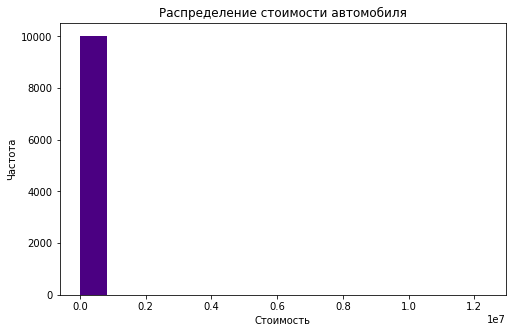

In [186]:
plt.figure(figsize=(8,5))
plt.hist(df.price, bins=15, color='indigo')
plt.xlabel('Стоимость')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобиля');

График гистограммы в таком виде не дает представления о реальном распределении, но из него можно сделать вывод о наличии выбросов. Постройем «ящик с усами» для стоимости автобомиля, а также применим форматирование для отображения значений стоимости. 

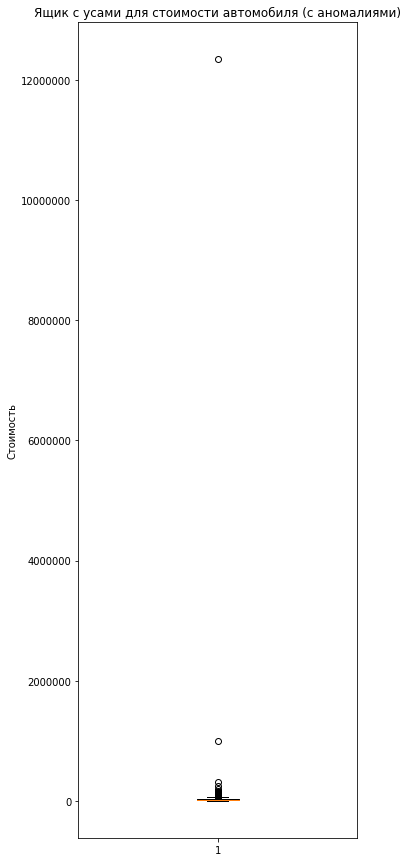

In [187]:
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(df.price)
ax.set_ylabel('Стоимость')
ax.set_title('Ящик с усами для стоимости автомобиля (с аномалиями)')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

https://datavizcatalogue.com/RU/metody/diagramma_razmaha.html

<img src="pic3.png"></img>

Из «ящика с усами» можно увидеть, что выбросы действительно существуют, но из-за их большого разброса основаная часть графика («ящик») почти незаметна.
Выведем описательные статистики стоимости автомобиля, чтобы изучить значения, обозначающие границы «ящика». С помощью `apply(lambda x: f"{x:0.3f}")` отобразите значения в удобном для восприятия виде.

In [188]:
df.price.describe().apply(lambda x: f"{x:0.3f}")

count       10014.000
mean        20605.855
std        124532.123
min           500.000
25%          7900.000
50%         15590.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

Выведем границы для нормальных значений стоимости автомобиля, используя интерквартильный размах. Посмотрите, входят ли минимальное и максимальное значения в интервал между полученными границами.

In [189]:
boundaries = calculate_outliers(df.price)
boundaries

(-22235.0, 58125.0)

In [190]:
if df.price.max() < boundaries[1]:
    print('Максимальное значение входит в интервал нормальных значений')
else:
    print('Максимальное значение не входит в интервал нормальных значений')
    
if df.price.min() > boundaries[0]:
    print('Минимальное значение входит в интервал нормальных значений')
else:
    print('инимальное значение не входит в интервал нормальных значений')

Максимальное значение не входит в интервал нормальных значений
Минимальное значение входит в интервал нормальных значений


In [191]:
#количество выбросов в стоимости автомобиля
is_outlier = (df.price < boundaries[0]) | (df.price > boundaries[1]) 
is_outlier.sum()

210

In [192]:
df[is_outlier]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995,1994.0,NaN,oldsmobile 442,gas,111111.0,clean,automatic,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,wi,43.098400,-89.273400,2021-04-25T10:10:43-0500,high
33,7304521734,https://kpr.craigslist.org/ctd/d/pasco-2019-fo...,kennewick-pasco-richland,https://kpr.craigslist.org,79999,2019.0,ford,f450 deisel power stroke,diesel,41759.0,clean,automatic,https://images.craigslist.org/00D0D_ctOGGthFxQ...,2019 Ford F450 Lariat FX4 Dually 4x4 **Clean C...,wa,46.234838,-119.128015,2021-04-09T19:46:04-0700,high
57,7314413105,https://inlandempire.craigslist.org/ctd/d/cost...,inland empire,https://inlandempire.craigslist.org,69888,1994.0,ford,coe,gas,1.0,clean,automatic,https://images.craigslist.org/00M0M_8jgBCZZuG6...,Awesome Resto-Mod COE Ford Car Hauler. Equippe...,ca,33.680100,-117.908500,2021-04-29T10:49:29-0700,high
96,7311450619,https://wenatchee.craigslist.org/ctd/d/kittita...,wenatchee,https://wenatchee.craigslist.org,58995,2020.0,jeep,wrangler,gas,17799.0,clean,automatic,https://images.craigslist.org/00a0a_chVstv8e4Z...,ＷＩＮＤＹ ＣＨＥＶＲＯＬＥＴ ⭐ No Payments For 90 Days* ⭐...,wa,46.999600,-120.516300,2021-04-23T10:43:27-0700,high
144,7305640478,https://siouxfalls.craigslist.org/ctd/d/gilber...,sioux falls / SE SD,https://siouxfalls.craigslist.org,59900,2014.0,ford,f550 xl,diesel,156000.0,clean,automatic,https://images.craigslist.org/00x0x_httQ0BwNkq...,**FOR SALE** 2014 Ford F550 Super Duty 45' Al...,sd,42.117274,-88.436783,2021-04-12T10:34:12-0500,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017.0,rover,other,gas,47000.0,clean,automatic,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03T16:37:36-0500,high
10004,7315493686,https://palmsprings.craigslist.org/ctd/d/fonta...,palm springs,https://palmsprings.craigslist.org,68995,2016.0,ram,2500,diesel,61130.0,clean,automatic,https://images.craigslist.org/00p0p_5PdfAkd0AM...,2016 Ram 2500 Laramie Offered by: R&B Auto...,ca,34.107220,-117.455310,2021-05-01T13:40:57-0700,high
10020,7314385254,https://spokane.craigslist.org/ctd/d/puyallup-...,spokane / coeur d'alene,https://spokane.craigslist.org,86977,2017.0,ford,f450 super duty crew cab,diesel,16806.0,clean,automatic,https://images.craigslist.org/00H0H_5P0NdUIgHi...,2017 *** Ford F450 Super Duty Crew Cab Platinu...,id,47.197304,-122.291776,2021-04-29T10:03:19-0700,high
10027,7307184389,https://holland.craigslist.org/ctd/d/otsego-20...,holland,https://holland.craigslist.org,61022,2020.0,gmc,sierra 1500,gas,5894.0,clean,automatic,https://images.craigslist.org/00i0i_64FIhCkyTb...,"2020 GMC Sierra 1500 AT4 -- $61,022 ☎ Call ...",mi,42.448987,-85.661948,2021-04-15T11:05:47-0400,high


Выведем последние 15 записей в отсортированном ранее датафрейме с выбросами, чтобы изучить признаки для наиболее дорогих автомобилей.

In [193]:
df[is_outlier].sort_values(by='price').tail(15)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
4144,7311841843,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,120000,2021.0,chevrolet,corvette c8 z51,gas,10.0,clean,automatic,https://images.craigslist.org/00z0z_99zXyVvNmm...,New arrival Z51 Call or text annamarie for d...,nm,35.081800,-106.648200,2021-04-24T08:38:45-0600,high
1700,7303398175,https://pullman.craigslist.org/cto/d/pullman-6...,pullman / moscow,https://pullman.craigslist.org,123456,1994.0,NaN,cadvwrambuick,gas,3245000.0,missing,other,https://images.craigslist.org/00i0i_5iBwIawLgG...,I have several cars to get rid of: A '65 Ramb...,id,46.735200,-117.172900,2021-04-07T15:57:23-0700,high
9235,7308732637,https://evansville.craigslist.org/ctd/d/evansv...,evansville,https://evansville.craigslist.org,123456,2006.0,jeep,wrangler,gas,12345.0,clean,other,https://images.craigslist.org/00I0I_2IkqjY69Zq...,Very Nice TJ jeeps and a few LJ jeep wranglers...,in,38.025845,-87.596457,2021-04-18T09:55:42-0500,high
3009,7308463617,https://jacksonville.craigslist.org/cto/d/pont...,jacksonville,https://jacksonville.craigslist.org,129000,2018.0,mercedes-benz,benz amg gt c,gas,4000.0,clean,automatic,https://images.craigslist.org/00C0C_bN8j4IcEqW...,Beautiful car in perfect condition. Very rare ...,fl,30.122300,-81.362700,2021-04-17T16:48:42-0400,high
5165,7314445453,https://boston.craigslist.org/gbs/ctd/d/methue...,boston,https://boston.craigslist.org,129995,2007.0,ferrari,f430 spider,gas,12351.0,clean,manual,https://images.craigslist.org/00q0q_3DqREXHC0j...,2007 Ferrari F430 Spider 2dr Convertible O...,ma,42.756205,-71.210258,2021-04-29T14:45:08-0400,high
6591,7312384300,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,https://orlando.craigslist.org,129999,2018.0,mercedes-benz,maybach s560,gas,6000.0,clean,automatic,https://images.craigslist.org/00u0u_fKyDNpMeQR...,"Serious/ready buyers, please call or text @ (4...",fl,28.463700,-81.394800,2021-04-25T12:58:01-0400,high
9063,7314817013,https://sandiego.craigslist.org/csd/ctd/d/dall...,san diego,https://sandiego.craigslist.org,139950,2017.0,NaN,Mclaren 570GT W/ Upgrades,gas,13000.0,clean,automatic,https://images.craigslist.org/00N0N_2egaCVi4pq...,SPECIALTYEXOTICS.COMCALL/TXT 469-215-1902FREE ...,ca,32.790400,-96.804400,2021-04-30T08:20:20-0700,high
4256,7316319465,https://portland.craigslist.org/clc/ctd/d/glad...,portland,https://portland.craigslist.org,149990,2015.0,mercedes-benz,sprinter 3500 airs,diesel,49291.0,clean,automatic,https://images.craigslist.org/00B0B_79v5I132cL...,2015 Mercedes-Benz Sprinter 3500 Airstream Int...,or,45.382346,-122.605132,2021-05-03T11:04:09-0700,high
8876,7313664504,https://austin.craigslist.org/cto/d/austin-sup...,austin,https://austin.craigslist.org,150000,2006.0,NaN,Peterbilt 378,diesel,1234.0,clean,manual,https://images.craigslist.org/00v0v_ejAvqrK3iP...,Selling a Wonderful Super Dump! 2006 Peterbilt...,tx,30.364900,-97.682700,2021-04-27T21:01:28-0500,high
9204,7306718413,https://desmoines.craigslist.org/ctd/d/portlan...,des moines,https://desmoines.craigslist.org,163540,2020.0,mercedes-benz,other,other,6318.0,clean,automatic,https://images.craigslist.org/00y0y_i26NvL7pZC...,2020 *** Mercedes-Benz G-Class G63 AMG*** ...,ia,45.494265,-122.579192,2021-04-14T11:26:24-0500,high


Среди автомобилей с аномальной стоимостью действительно присуствуют автомобили, высокую стоимость которых можно объяснить, в первучю очередь, производителем и низким пробегом. Но будем опираться на стоимость основной массы автомобилей, поэтому удалим все аномальные значения и сохраним датафрейм без аномалий в переменную df, выведем первые 5 значений

In [194]:
df.loc[(df.price < boundaries[0]) | (df.price > boundaries[1])] = np.nan

In [195]:
df.price = df.price.dropna(axis = 0)

In [196]:
len(df.price)

10014

### Исследование зависимости стоимости автомобиля от года производства

Сформируем и отобразим новый датафрейм, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год (воспользуейтемся группировкой по годам). Не забудем переименовать колонки согласно их содержанию.

In [197]:
stats1 = df.groupby(['year'], as_index=False)[['price']].mean()
stats1 = stats1.rename(columns={'price': 'price_mean'})
stats1

,year,price_mean
0,1994.0,13530.481959
1,1995.0,9610.060606
2,1996.0,9333.615385
3,1997.0,7078.586957
4,1998.0,6528.672727
5,1999.0,7356.361446
6,2000.0,7614.410256
7,2001.0,7987.430894
8,2002.0,7325.226667
9,2003.0,7747.435484


Построим диаграмму рассеяния для визуализации зависимости стоимости от года выпуска автомобиля

Text(0.5, 0, 'Год')

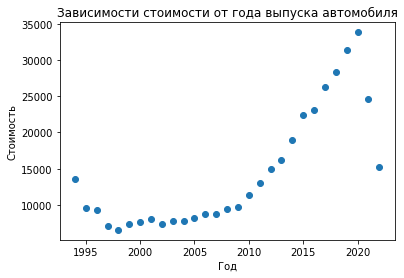

In [198]:
plt.figure
plt.scatter(stats1['year'], stats1['price_mean'],)
plt.title('Зависимости стоимости от года выпуска автомобиля')
plt.ylabel('Стоимость')
plt.xlabel('Год')

Text(0.5, 0, 'Год')

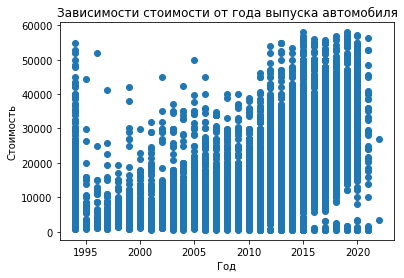

In [199]:
plt.figure
plt.scatter(df['year'], df['price'],)
plt.title('Зависимости стоимости от года выпуска автомобиля')
plt.ylabel('Стоимость')
plt.xlabel('Год')

Из графика можно сделать вывод о возрастающем тренде: чем новее автомобиль, тем выше его цена. Исключение составляют наиболее старые и самые новые автомобили. Проверим, достаточно ли данных в выбивающихся из тренда значениях по годам. Для этого выведем количество автомобилей, произведенных в каждый год, воспользуейтесь группировкой по годам

In [200]:
stats3 = df.groupby(['year'], as_index=False)[['id']].count()
stats3 = stats3.rename(columns={'id': 'count'})
stats3

,year,count
0,1994.0,388
1,1995.0,33
2,1996.0,26
3,1997.0,46
4,1998.0,55
5,1999.0,83
6,2000.0,78
7,2001.0,123
8,2002.0,150
9,2003.0,186


За последние два года мало накопленной информации — исключим их из исследования. С помощью фильтрации оставим в датафрейме автомобили, произведенные не позднее 2021 года

In [201]:
df = df[df.year < 2021]
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
0,7.308295e+09,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990.0,2020.0,ram,2500 crew cab big horn,diesel,27442.0,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7.316380e+09,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942.0,2016.0,ford,explorer 4wd 4dr xlt,other,60023.0,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7.313734e+09,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590.0,2017.0,volkswagen,golf r hatchback,gas,14048.0,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7.308211e+09,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500.0,2013.0,toyota,rav4,gas,117291.0,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
5,7.303797e+09,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590.0,2012.0,bmw,1 series 128i coupe 2d,other,80465.0,clean,other,https://images.craigslist.org/00F0F_5UAXmOzC18...,Carvana is the safer way to buy a car During t...,tn,35.970000,-83.940000,2021-04-08T15:10:56-0400,medium


На отфильтрованных данных повторим действия по формированию нового датафрейма, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год. 

In [202]:
stats5 = df.groupby(['year'], as_index=False)[['price']].mean()
stats5 = stats5.rename(columns={'price': 'price_mean'})
stats5

,year,price_mean
0,1994.0,13530.481959
1,1995.0,9610.060606
2,1996.0,9333.615385
3,1997.0,7078.586957
4,1998.0,6528.672727
5,1999.0,7356.361446
6,2000.0,7614.410256
7,2001.0,7987.430894
8,2002.0,7325.226667
9,2003.0,7747.435484


Построем линейный график ([plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)) для визуализации зависимости стоимости от года выпуска автомобиля, настройте цвет линии —  `blue`, символ маркировки точек (`marker`) — ромб/алмаз — `D`, цвет точек (`markerfacecolor`) — `orange`. Используем среднюю стоимость автомобиля, рассчитаную в предыдущем задании.

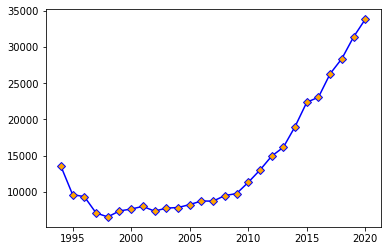

In [203]:
plt.figure()
plt.plot(stats5['year'], stats5['price_mean'], 'blue', marker='D', markerfacecolor='orange')

In [204]:
coef_pirsona = df.year.corr( df.price).tolist()
coef_pirsona

0.5435191717087894

Посчитаем коэффициент корреляции Пирсона для стоимости автомобиля и года его производства. Ответим на вопросы:


    1. Можно ли сделать вывод о существовании линейной связи между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: да, тк значение коэффициента выше среднего

    2. Можно ли сделать вывод о сильной корреляции между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: С помощью коэффициента корреляции Пирсона можно определить только силу линейной взаимосвязи между переменными, другие виды взаимосвязей выявляются методами регрессионного анализа. С точки зрения линейного коэфициента корреляции - средняя корреляция

    3. Существующая связь является прямой или обратной? Почему?
    Ваш ответ: Существующая связь прямая. Тк значение коэффициента больше 0

Для обновленных данных построем гистограмму распределения стоимости автомобиля

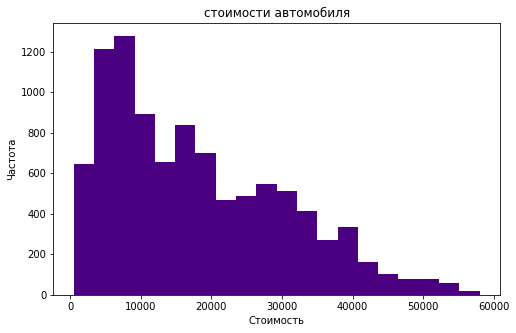

In [205]:
plt.figure(figsize=(8,5))
plt.hist(df.price, bins=20, color='indigo')
plt.xlabel('Стоимость')
plt.ylabel('Частота')
plt.title('стоимости автомобиля');

## Исследование зависимости ценовой категории автомобилиля от стоимости и года производства

На одном полотне построем графики распределения стоимости автомобиля для каждой из ценовой категории автомобиля. Настроим общий размер фигуры — 12x8, параметры прозрачности — 0.7, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудем подписать название графика и оси, а также вывести легенду для ценовой категории.

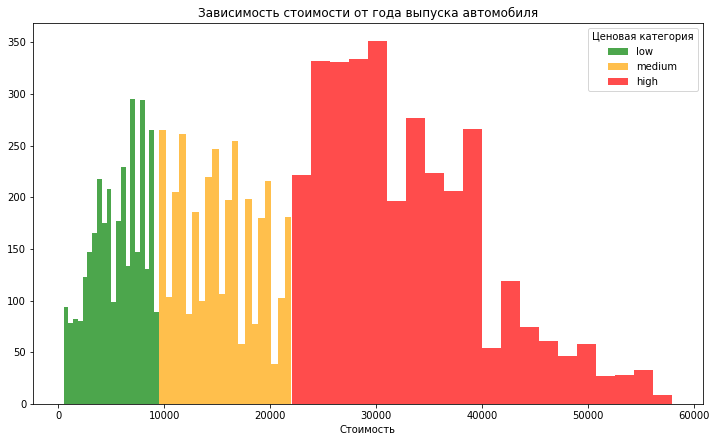

In [206]:
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

fig, ax = plt.subplots(figsize=(12, 7))
for price_category in colors:
    color = colors[price_category]
    data = df[df['price_category'] == price_category]

    ax.hist(data['price'], bins=20, color=color, alpha=0.7)
    
plt.title("Зависимость стоимости от года выпуска автомобиля")
plt.xlabel('Стоимость')
plt.legend(colors, title="Ценовая категория");

На одном полотне постройте диаграмму рассеяния для стоимости автомобиля и его года выпуска. Раскрасим каждую точку (автомобиль) согласно ценовой категории автомобиля. Настроим общий размер фигуры — 12x8, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории, расположив ее в нижнем правом углу.

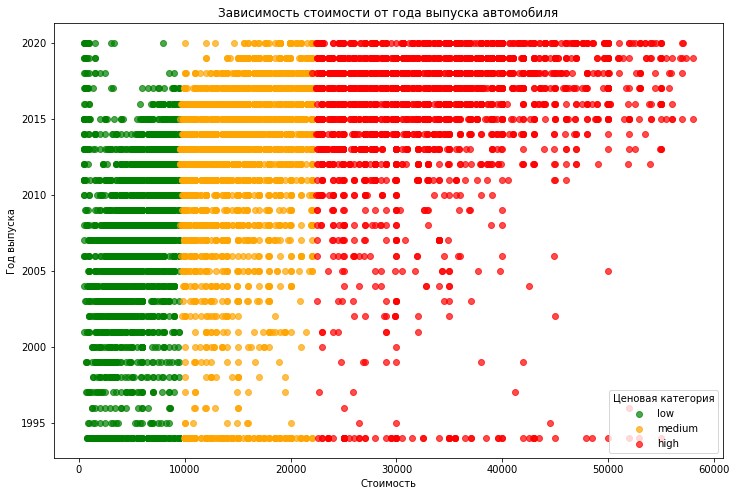

In [207]:
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}
fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df[df['price_category'] == price_category]

    ax.scatter(data['price'], data['year'], c=color, label=price_category, alpha=0.7)

ax.legend(loc='lower right', title="Ценовая категория")
plt.title("Зависимость стоимости от года выпуска автомобиля")
plt.xlabel('Стоимость')
plt.ylabel('Год выпуска')
plt.show()

В каждом годе есть машины из разных целовых категорий. Также четко видны границы ценовых категорий. Исходя из этого графика можно сделать вывод о том, что (за исключением 1995 года) чем позднее год выпуска, тем выше цена автомобиля.

### Визуализация категориальных переменных

Сформируем и отобразим новый датафрейм, в котором будет содержаться статистика о производителе автомобиля и количестве произведенных им автомобилей (воспользуейтесь группировкой). Не забудем переименовать колонки согласно их содержанию

In [208]:
stats4_1 = df.groupby(['manufacturer'], as_index=False)[['id']].count()
stats4_1 = stats4_1.rename(columns={'id': 'count'})
stats4_1

,manufacturer,count
0,acura,150
1,alfa-romeo,14
2,audi,197
3,bmw,328
4,buick,144
5,cadillac,178
6,chevrolet,1248
7,chrysler,160
8,datsun,2
9,dodge,321


Построим столбчатую диаграмму для производителей автомобиля, настройте размер фигуры — 20x10, ширину интервалов (width) — 0.9, цвета — чередующиеся springgreen и dodgerblue. 

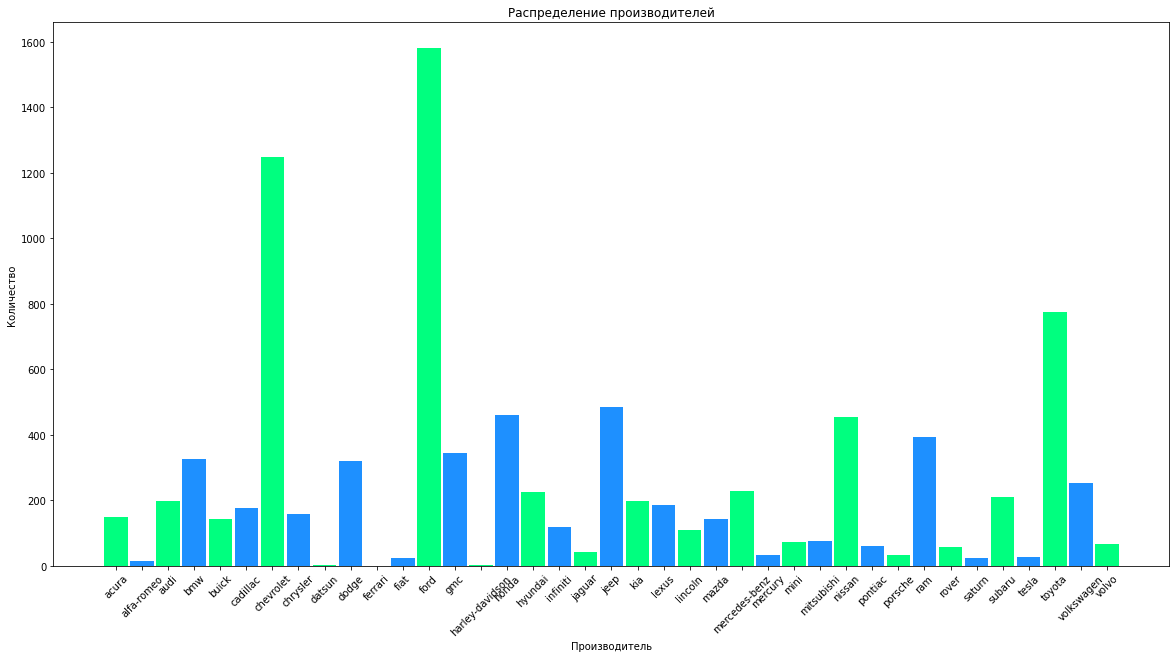

In [209]:
plt.figure(figsize=(20,10))
plt.bar(stats4_1['manufacturer'], stats4_1['count'], color=['springgreen', 'dodgerblue'], width=0.9)
plt.xlabel('Производитель')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.title('Распределение производителей');

Сформируем и отобразим новый датафрейм, в котором будет содержаться статистика о коробке передач автомобиля и количестве автомобилей с такой коробкой передач (воспользуейтесь группировкой).

In [210]:
stats4_3 = df.groupby(['transmission'], as_index=False)[['id']].count()
stats4_3 = stats4_3.rename(columns={'id': 'count'})
stats4_3

,transmission,count
0,automatic,7486
1,manual,620
2,other,1612


Построим круговую диаграмму для коробки передач автомобиля, настройте размер фигуры — 12x8, формат подписи о соотношении категорий, расстояние от метки о соотношении категорий до края сегмента. 

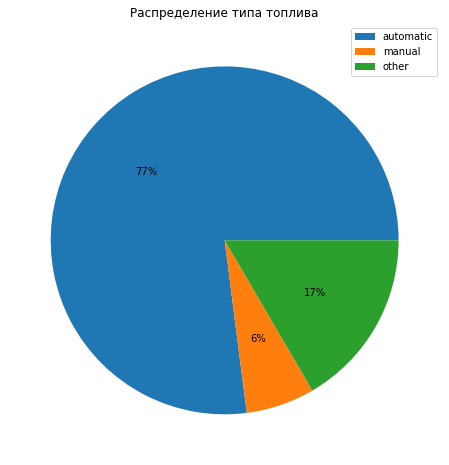

In [211]:
plt.figure(figsize=(12, 8))
plt.pie(stats4_3['count'], labels=stats4_3['transmission'], labeldistance=None, autopct = '%1.0f%%')
plt.title("Распределение типа топлива")
plt.legend()
plt.show();